In [1]:
!pip install mmcv-full

     |████████████████████████████████| 324 kB 10.7 MB/s 
     |████████████████████████████████| 185 kB 47.2 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31468152 sha256=270dc7b454cae7191767686e9c8330a8e9d4b725a60d935669d0875a7580edd2
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full


In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 21083, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 21083 (delta 13), reused 42 (delta 5), pack-reused 21016
Receiving objects: 100% (21083/21083), 24.83 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (14708/14708), done.


In [5]:
%cd mmdetection/

/content/mmdetection


In [6]:
ls -la

total 140
drwxr-xr-x 15 root root  4096 Sep 29 03:00 ./
drwxr-xr-x  1 root root  4096 Sep 29 03:00 ../
-rw-r--r--  1 root root   273 Sep 29 03:00 CITATION.cff
drwxr-xr-x 79 root root  4096 Sep 29 03:00 configs/
drwxr-xr-x  2 root root  4096 Sep 29 03:00 demo/
drwxr-xr-x  2 root root  4096 Sep 29 03:00 .dev_scripts/
drwxr-xr-x  3 root root  4096 Sep 29 03:00 docker/
drwxr-xr-x  4 root root  4096 Sep 29 03:00 docs/
drwxr-xr-x  4 root root  4096 Sep 29 03:00 docs_zh-CN/
drwxr-xr-x  8 root root  4096 Sep 29 03:00 .git/
drwxr-xr-x  4 root root  4096 Sep 29 03:00 .github/
-rw-r--r--  1 root root  1356 Sep 29 03:00 .gitignore
-rw-r--r--  1 root root 11398 Sep 29 03:00 LICENSE
-rw-r--r--  1 root root   205 Sep 29 03:00 MANIFEST.in
drwxr-xr-x  7 root root  4096 Sep 29 03:00 mmdet/
-rw-r--r--  1 root root  1960 Sep 29 03:00 model-index.yml
-rw-r--r--  1 root root  1169 Sep 29 03:00 .pre-commit-config.yaml
-rw-r--r--  1 root root   293 Sep 29 03:00 pytest.ini
-rw-r--r--  1 root root  9684 Sep 29 

In [ ]:
!python setup.py install

In [8]:
mkdir checkpoints

In [9]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-09-29 03:15:14--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.5MB/s    in 14s     

2021-09-29 03:15:30 (11.4 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [11]:
!ls -la ./checkpoints/

total 163376
drwxr-xr-x  2 root root      4096 Sep 29 03:15 .
drwxr-xr-x 19 root root      4096 Sep 29 03:12 ..
-rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [16]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

In [2]:
config_file = "/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
checkpoint_file = "/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth"

In [3]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu102 True
2.17.0
11.1
GCC 7.5


In [6]:
%cd mmdetection/

/content/mmdetection


In [7]:
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [9]:
type(result)

list

In [10]:
len(result) # 80개 클래스 전체에 대해 검출된 클래스만 값이 있고 검출되지 않은 클래스는 비어있음

80

In [11]:
result[0]

array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
        1.35454327e-01],
       [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
        8.88783410e-02],
       [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
        7.20723346e-02]], dtype=float32)

In [13]:
result[5]

array([], shape=(0, 5), dtype=float32)

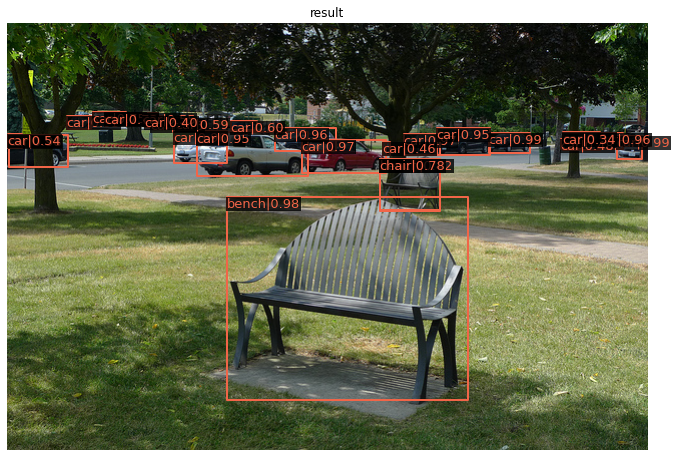

In [17]:
show_result_pyplot(model, img, result)

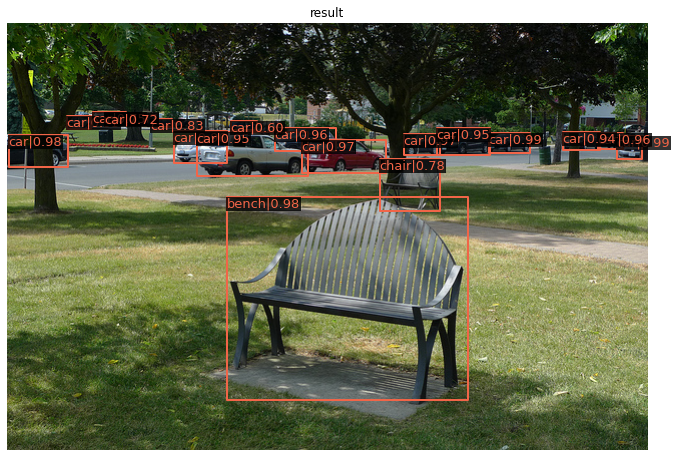

In [22]:
show_result_pyplot(model, img, result, score_thr=0.6)

In [26]:
import cv2
import mmcv

video_reader = mmcv.VideoReader("/content/mmdetection/demo/demo.mp4")
video_writer = None

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter("/content/mmdetection/demo/demo_out.mp4", fourcc, 
                               video_reader.fps, (video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.4)
  video_writer.write(frame)

if video_writer:
  video_writer.release()

[                                                  ] 0/67, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 67/67, 1.6 task/s, elapsed: 43s, ETA:     0s
